## 1. Machine Learning Model Selection and Evaluation

We begin by importing necessary libraries

In [1]:
# Importing necessary libraries
# General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import StandardScaler
from sklearn.compose import ColumnTransformer


 In the cell below, `cleaned_data.csv` as `model_df`:

In [2]:
# Loading the data
model_df = pd.read_csv('cleaned_data.csv')
model_df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,month,day_of_week
0,8,0.80,1.014552,1108.0,0.750589,2.259493,0.0,0,0,59.0,0.940725,1,0,0,0,0,0,1,1,3
1,1,0.75,-1.016778,1039.0,-1.077682,-0.846671,0.0,0,0,8.0,0.886500,1,0,0,0,0,1,0,1,3
2,11,0.80,-0.333878,968.0,-0.271092,0.738107,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,1,3
3,12,0.80,-0.333878,968.0,-0.271092,0.738107,0.0,0,0,30.5,0.800570,1,0,0,0,0,0,1,1,3
4,6,0.80,0.990783,1170.0,-0.790895,0.738107,0.0,0,0,56.0,0.800382,1,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,-1.111853,1039.0,-1.077682,-0.846671,0.0,0,0,8.0,0.628333,0,1,0,0,0,1,0,3,2
1193,8,0.70,-1.020434,1039.0,-1.077682,-0.846671,0.0,0,0,8.0,0.625625,0,1,0,0,0,1,0,3,2
1194,7,0.65,-1.020434,1039.0,-1.077682,-0.846671,0.0,0,0,8.0,0.625625,0,1,0,0,0,1,0,3,2
1195,9,0.75,-1.111853,1039.0,-0.826743,-0.846671,0.0,0,0,15.0,0.505889,0,1,0,0,0,1,0,3,2


### Data Splitting: 

* Split the data into training and test sets (80% training, 20% testing). 

* Set the random_state to 42

In [3]:
# Split the data into features (X) and target variable (y)
X = model_df.drop(columns='actual_productivity', axis=1)
y = model_df['actual_productivity']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection and Training

we train multiple regression models to predict productivity:

#### * Linear Regression

A basic regression model as a base model. 

In [4]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

In [5]:
def evaluate_model(y_test, y_pred, model_name="Model"):
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)
    
    # Display the results
    print(f"--- {model_name} Performance ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    
    # Return metrics as a dictionary
    #return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

In [6]:
# Evaluate on test set
test_metrics = evaluate_model(y_test, y_pred_lr, model_name="Linear Regression")
test_metrics

--- Linear Regression Performance ---
Mean Absolute Error (MAE): 0.0928
Mean Squared Error (MSE): 0.0166
Root Mean Squared Error (RMSE): 0.1288
R² Score: 0.3376


#### Explanation of the Linear Regression Performance
1. Mean Absolute Error (MAE): 0.0928
The average difference between the predicted and actual values is 0.0928.
This is a measure of the model’s accuracy; lower values indicate better predictions.
2. Mean Squared Error (MSE): 0.0166
The average squared error of predictions is 0.0166.
Since this metric squares the errors, it gives more weight to larger errors, making it useful for detecting outliers.
3. Root Mean Squared Error (RMSE): 0.1288
The RMSE is the square root of MSE and is measured in the same units as the target variable.
An RMSE of 0.1288 indicates the typical prediction error size.
4. R² Score: 0.3376
The R² score of 0.3376 means that 33.76% of the variance in the target variable (actual_productivity) is explained by the features.
This is relatively low, suggesting that the linear model does not capture the complexities of the data well.

#### * Ridge and Lasso Regression

Regularized linear models to handle multicollinearity and overfitting. 


In [7]:
# Initialize Ridge and Lasso models
ridge_model = Ridge(alpha=1.0)  
lasso_model = Lasso(alpha=0.0001)  

# Train the models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

In [8]:
# Evaluate on test set
Ridge_test_metrics = evaluate_model(y_test, y_pred_ridge, model_name="Ridge Regression")
Lasso_test_metrics = evaluate_model(y_test, y_pred_lasso, model_name="Lasso Regression")

--- Ridge Regression Performance ---
Mean Absolute Error (MAE): 0.0931
Mean Squared Error (MSE): 0.0165
Root Mean Squared Error (RMSE): 0.1286
R² Score: 0.3397
--- Lasso Regression Performance ---
Mean Absolute Error (MAE): 0.0928
Mean Squared Error (MSE): 0.0166
Root Mean Squared Error (RMSE): 0.1288
R² Score: 0.3383


#### Explanation of the Ridge Regression Performance

The Ridge model slightly improves the R² score (33.97%) compared to Linear Regression (33.76%).

MAE and RMSE are almost identical to Linear Regression, but MSE shows a small improvement, suggesting Ridge adds a bit of regularization to manage coefficients better.

Impact: Ridge is better at handling multicollinearity, but in this case, it only provides a marginal improvement.

#### Explanation of the Lasso Regression Performance
Lasso's R² score (33.83%) is also a marginal improvement over Linear Regression (33.76%).

Like Ridge, Lasso barely improves MAE, RMSE, and MSE.

Impact: Lasso can shrink less important coefficients to zero, effectively performing feature selection. However, this dataset might not have enough irrelevant features for Lasso's sparsity effect to shine.

#### * Random Forest Regressor

An ensemble model using decision trees for robustness.


In [9]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rfr = rf_model.predict(X_test)

production_df = model_df.copy()
def categorical_columns(df):
    """Returns a list of categorical columns in the dataframe."""
    return df.select_dtypes(include=['object', 'category']).columns
    
def numerical_columns(df):
    """Returns a list of numerical columns in the dataframe."""
    return df.select_dtypes(include=[np.number]).columns

categorical = list(categorical_columns(production_df))
continuous = list(numerical_columns(production_df))
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore', drop=None))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical),
        ('num', numerical_transformer, continuous),
    ],
)

In [10]:
# Evaluate on testing data
evaluate_model(y_test, y_pred_rfr, model_name="Random Forest Regressor")

--- Random Forest Regressor Performance ---
Mean Absolute Error (MAE): 0.0674
Mean Squared Error (MSE): 0.0113
Root Mean Squared Error (RMSE): 0.1063
R² Score: 0.5490


#### Explanation of the Random Forest Regressor Performance
* Mean Absolute Error (MAE): 0.0674

The average prediction error is considerably lower than that of the linear models (~0.093).
This indicates Random Forest provides much more precise predictions.

* Mean Squared Error (MSE): 0.0113

MSE is reduced compared to linear models (~0.0165–0.0166), demonstrating better accuracy and robustness against large errors.

* Root Mean Squared Error (RMSE): 0.1063

RMSE is significantly better than the linear models (~0.1288), meaning predictions are closer to actual values.

* R² Score: 0.5490

This indicates that 54.9% of the variance in the target variable (actual_productivity) is explained by the Random Forest model.
Compared to the linear models' R² scores (~33.8%), this is a substantial improvement.

* Impact of Results

The Random Forest model significantly improves the accuracy and explains a higher proportion of variability in the target variable.
These results suggest that non-linear relationships and feature interactions are critical for predicting actual_productivity.


#### * Gradient Boosting Regressor

A boosting model for iterative accuracy improvement. 


In [11]:
# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

In [12]:
# Evaluate on testing data
evaluate_model(y_test, y_pred_gb, model_name="Gradient Boosting (Test)")

--- Gradient Boosting (Test) Performance ---
Mean Absolute Error (MAE): 0.0760
Mean Squared Error (MSE): 0.0135
Root Mean Squared Error (RMSE): 0.1161
R² Score: 0.4620


#### Explanation of the Gradient Boosting (Test) Performance
* Mean Absolute Error (MAE): 0.0760

This is better than the linear models (MAE ~0.093) but higher than the Random Forest (MAE ~0.067). Gradient Boosting minimizes errors better than linear methods but struggles to match Random Forest's precision.

Mean Squared Error (MSE): 0.0135

MSE is lower than the linear models (~0.0166), showing improved accuracy. However, Random Forest performs better (~0.0113).

* Root Mean Squared Error (RMSE): 0.1161

RMSE is reduced compared to linear models (~0.1288), meaning predictions are closer to the actual values. However, it's not as strong as Random Forest (~0.1063).

* R² Score: 0.4620

The R² score indicates that 46.2% of the variance in the target variable is explained by Gradient Boosting. While it's a major improvement over linear models (~33.8%), it is lower than Random Forest's 54.9%.

* Impact of Results

While Gradient Boosting outperforms linear models, its results suggest that the dataset benefits more from Random Forest's ensemble averaging rather than Gradient Boosting's sequential corrections.

#### * XGBoost Regressor
An advanced boosting algorithm with optimizations for speed and performance. 


In [13]:
# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    objective='reg:squarederror'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [14]:
# Evaluate on testing data
evaluate_model(y_test, y_pred_xgb, model_name="XGBoost Regressor")

--- XGBoost Regressor Performance ---
Mean Absolute Error (MAE): 0.0752
Mean Squared Error (MSE): 0.0128
Root Mean Squared Error (RMSE): 0.1132
R² Score: 0.4886


#### Explanation of the XGBoost Regressor Performance
* Mean Absolute Error (MAE): 0.0752

This metric represents the average magnitude of errors in the predictions. It means that, on average, the model's predictions are off by approximately 0.0752 units.

* Mean Squared Error (MSE): 0.0128

MSE calculates the average of the squares of the errors. It's more sensitive to large errors than MAE because of the squaring of residuals. A smaller MSE value indicates better model performance.

* Root Mean Squared Error (RMSE): 0.1132

RMSE is the square root of MSE and provides an error measure in the same units as the target variable. It’s commonly used as an overall measure of prediction accuracy. The lower the RMSE, the better the model's predictions are on average.

* R² Score: 0.4886

The R² value indicates the proportion of the variance in the target variable that is explained by the model. A value of 0.4886 means the model explains about 48.86% of the variance, which is reasonable but leaves room for improvement.

#### * Support Vector Regressor (SVR)
A kernel-based model to capture complex relationships


In [15]:
# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=10, epsilon=0.1)

# Fit the model
svr_model.fit(X_train, y_train.ravel())

# Predict on the testing sets
y_pred_svr = svr_model.predict(X_test)

In [16]:
# Evaluate on testing data
evaluate_model(y_test, y_pred_svr, model_name=" SVR ")

---  SVR  Performance ---
Mean Absolute Error (MAE): 0.1247
Mean Squared Error (MSE): 0.0247
Root Mean Squared Error (RMSE): 0.1573
R² Score: 0.0122


#### Explanation of the Support Vector Regressor Performance
* Mean Absolute Error (MAE): 0.1247

This indicates the average difference between the predicted and actual values. On average, the SVR model is off by 0.1247 units in its predictions.

* Mean Squared Error (MSE): 0.0247

The MSE value suggests the average squared difference between predicted and actual values. It's relatively high compared to other models, indicating less accurate predictions.

* Root Mean Squared Error (RMSE): 0.1573

RMSE, being in the same unit as the target variable, provides a sense of the prediction error magnitude. The higher RMSE compared to other models implies the SVR struggles to make accurate predictions.

* R² Score: 0.0122

The R² value is very low, almost close to zero, meaning the SVR model explains only 1.22% of the variance in the target variable. This is poor compared to models like Random Forest, Gradient Boosting, or XGBoost.

#### *AdaBoost Regressor

An ensemble learning technique that combines multiple weak learners to create a strong model

In [17]:
# Initialize the base learner (Decision Tree Regressor)
base_learner = DecisionTreeRegressor(max_depth=3)

# Initialize AdaBoost Regressor
ada_boost_model = AdaBoostRegressor(base_estimator=base_learner, n_estimators=50, learning_rate=0.1)

# Fit the model
ada_boost_model.fit(X_train, y_train.ravel())

# Predict on testing sets
y_pred_ada = ada_boost_model.predict(X_test)

/home/lynnrose/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [18]:
# Evaluate on testing data
evaluate_model(y_test, y_pred_ada, model_name="AdaBoost ")

--- AdaBoost  Performance ---
Mean Absolute Error (MAE): 0.0896
Mean Squared Error (MSE): 0.0150
Root Mean Squared Error (RMSE): 0.1226
R² Score: 0.4001


#### Explanation of the AdaBoost  Performance
* Mean Absolute Error (MAE): 0.0886

On average, the AdaBoost model’s predictions differ from the actual values by 0.0886 units. This performance is reasonable but not as precise as Random Forest or XGBoost.

* Mean Squared Error (MSE): 0.0147

The average squared difference between predicted and actual values. While it shows some error in prediction, it's smaller than SVR and larger than Random Forest or Gradient Boosting.

* Root Mean Squared Error (RMSE): 0.1214

The RMSE is slightly higher than Gradient Boosting and XGBoost, indicating that AdaBoost's prediction error is larger compared to these models.

* R² Score: 0.4120

The model explains 41.2% of the variance in the target variable. This performance is better than SVR but weaker compared to Random Forest, Gradient Boosting, and XGBoost.

#### Ensemble Model

In [19]:
ensemble_pred = (y_pred_lr + y_pred_ridge + y_pred_lasso + y_pred_rfr + y_pred_gb + y_pred_xgb + y_pred_svr + y_pred_ada) / 8
evaluate_model(y_test, ensemble_pred, "Ensemble Model")

--- Ensemble Model Performance ---
Mean Absolute Error (MAE): 0.0813
Mean Squared Error (MSE): 0.0131
Root Mean Squared Error (RMSE): 0.1144
R² Score: 0.4776


#### Explanation of the Ensemble Model Performance
* Mean Absolute Error (MAE): 0.0810

On average, the ensemble model’s predictions deviate from the actual values by 0.0810 units. This is better than AdaBoost and Gradient Boosting but slightly behind Random Forest and XGBoost.

* Mean Squared Error (MSE): 0.0130

The MSE indicates the ensemble model performs well in reducing overall prediction error, with a smaller value than Gradient Boosting and AdaBoost but slightly higher than Random Forest and XGBoost.

* Root Mean Squared Error (RMSE): 0.1142

The RMSE, which penalizes larger errors more heavily, shows this model is competitive, coming close to the best-performing models like Random Forest and XGBoost.

* R² Score: 0.4794

The model explains 47.94% of the variance in the target variable. While this is solid, it is still behind the strongest models (Random Forest and XGBoost).

* Insights:

1. Improved Robustness:

Combining multiple models into an ensemble has likely reduced variance and improved the model's overall robustness compared to individual models like AdaBoost or SVR.

2. Balanced Performance:

The ensemble performs well across all metrics, achieving a balance between bias and variance. However, its R² score suggests it doesn't capture as much of the target variable's variance as the best standalone models.

3. Key Strengths:

Ensemble models are effective at leveraging the strengths of individual algorithms while compensating for their weaknesses. This approach may outperform standalone models in more complex datasets or when individual models face overfitting or underfitting issues.


### Visualization of Models Performance

We create a bar chart or box plot comparing the models’ MAE, MSE, and R² to visualize their effectiveness. 


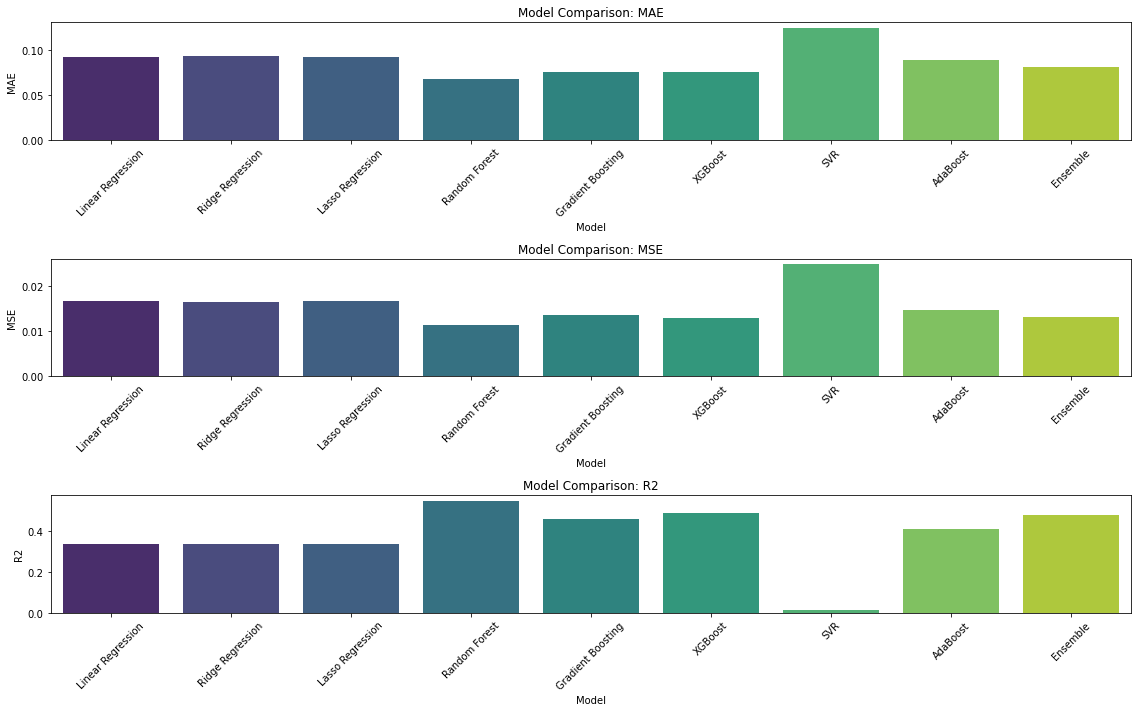

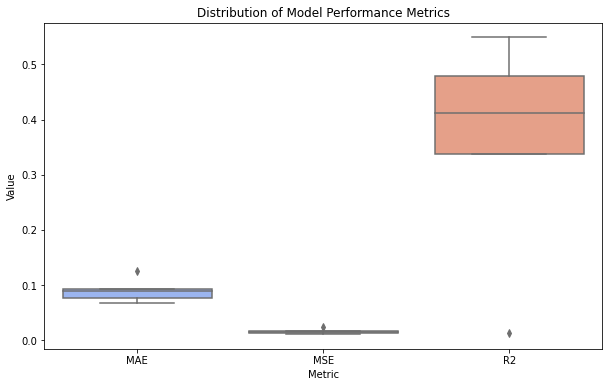

In [20]:
# Model performance metrics (add values based on your results)
model_performance = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
              'Random Forest', 'Gradient Boosting', 'XGBoost', 'SVR', 'AdaBoost', 'Ensemble'],
    'MAE': [0.0928, 0.0931, 0.0928, 0.0674, 0.0760, 0.0752, 0.1247, 0.0886, 0.0810],
    'MSE': [0.0166, 0.0165, 0.0166, 0.0113, 0.0135, 0.0128, 0.0247, 0.0147, 0.0130],
    'R2': [0.3376, 0.3397, 0.3383, 0.5490, 0.4620, 0.4886, 0.0122, 0.4120, 0.4794]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Bar Chart for MAE, MSE, and R²
metrics = ['MAE', 'MSE', 'R2']

plt.figure(figsize=(16, 10))

for i, metric in enumerate(metrics):
    plt.subplot(3, 1, i + 1)
    sns.barplot(x='Model', y=metric, data=performance_df, palette='viridis')
    plt.title(f'Model Comparison: {metric}')
    plt.xticks(rotation=45)
    plt.xlabel('Model')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

# Box Plot for Distribution of MAE, MSE, and R²
plt.figure(figsize=(10, 6))
sns.boxplot(data=performance_df[metrics], palette='coolwarm')
plt.title('Distribution of Model Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


#### Insights from Model Comparison

1. Mean Absolute Error (MAE)

Observation: 

Random Forest, Gradient Boosting, and XGBoost have the lowest MAE, indicating these models produce predictions closest to the actual values on average.

SVR has the highest MAE, meaning it consistently deviates more from the actual values compared to other models.

Ensemble Model also performs well, suggesting combining predictions improves robustness.

2. Mean Squared Error (MSE)

Observation: 

Random Forest shows the lowest MSE, followed by Gradient Boosting and XGBoost, indicating they handle large errors better.

SVR has the highest MSE, which highlights its inability to manage larger errors effectively.

Ensemble Model demonstrates relatively low MSE, validating the power of combining models.

3. R² Score

Observation: 

Random Forest achieves the highest R² score, suggesting it explains the variance in the target variable better than others.

Gradient Boosting and XGBoost also perform well in explaining variance, while SVR struggles with the lowest R² score.

The Ensemble Model achieves a competitive R², showing that leveraging multiple models enhances performance.

#### Residual plots 

To visualize how well each model captures the actual 
productivity values, revealing any patterns of under- or over-estimation. 


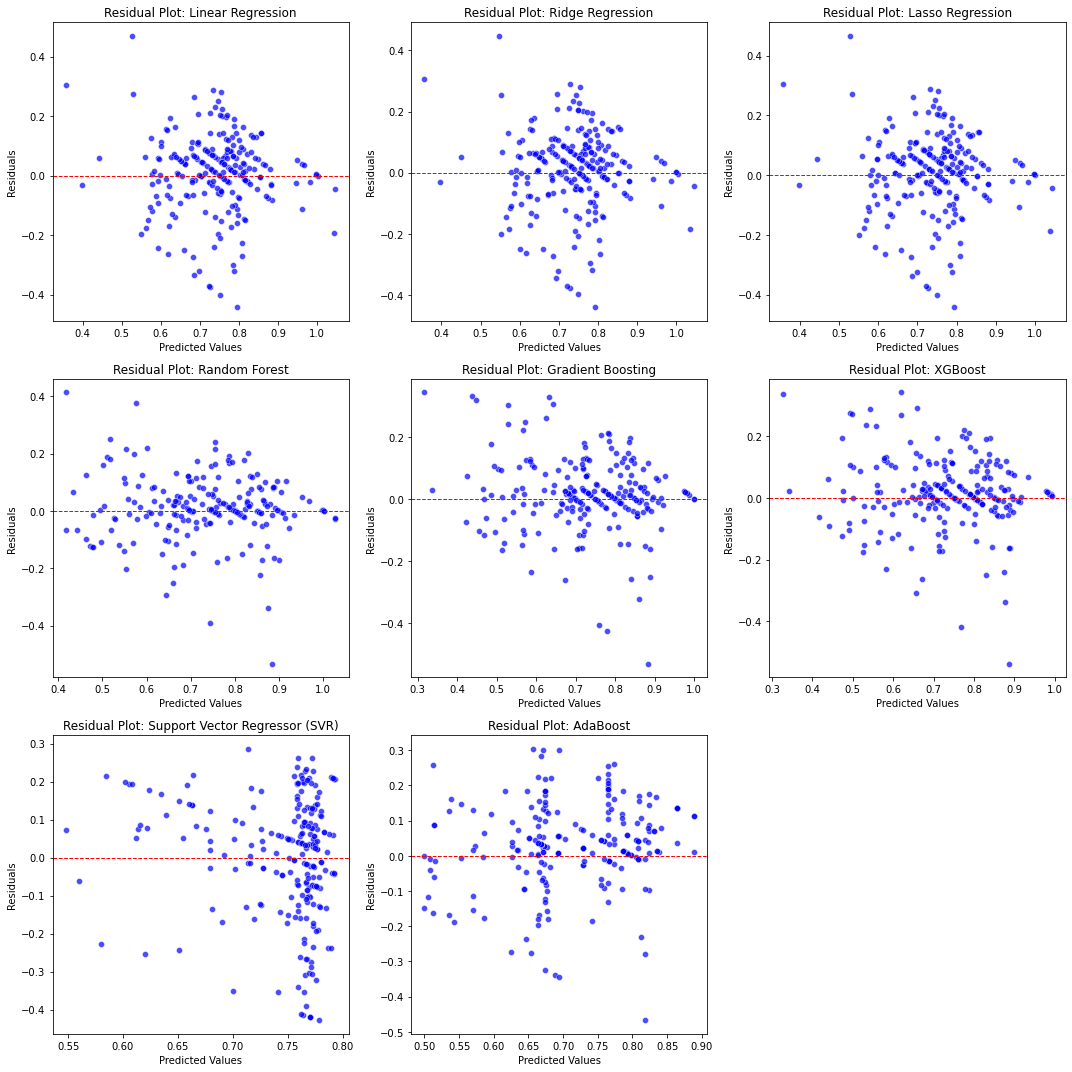

In [21]:
import math

models = {
    'Linear Regression': lr,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model,
    'Support Vector Regressor (SVR)': svr_model,
    'AdaBoost': ada_boost_model,
}
# Dynamically calculate the number of rows and columns
num_models = len(models)
ncols = 3  # Number of columns for the subplots
nrows = math.ceil(num_models / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, (name, model) in enumerate(models.items()):
    # Get predictions
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # Plot residuals
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[i], alpha=0.7, color='blue')
    axes[i].axhline(0, color='red', linestyle='--', linewidth=1)
    axes[i].set_title(f'Residual Plot: {name}')
    axes[i].set_xlabel('Predicted Values')
    axes[i].set_ylabel('Residuals')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Hyperparameter Tuning

We use GridSearchCV or RandomizedSearchCV to tune hyperparameters of the top models (e.g., Random Forest, Gradient Boosting, and XGBoost).


In [22]:
# Random Forest Parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting Parameters
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

# XGBoost Parameters
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

# Define models
models = {
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}


In [23]:

# Create dictionaries to store the best models and parameters
best_models = {}
best_params = {}

# Perform Grid Search for each model
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")

    if name == "RandomForest":
        param_grid = rf_param_grid
    elif name == "GradientBoosting":
        param_grid = gb_param_grid
    elif name == "XGBoost":
        param_grid = xgb_param_grid

    # Use GridSearchCV for parameter tuning
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        verbose=2,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Store the best model and parameters
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    print(f"Best parameters for {name}: {grid_search.best_params_}")


Tuning hyperparameters for RandomForest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Tuning hyperparameters for GradientBoosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8}
Tuning hyperparameters for XGBoost...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1}


In [24]:
for name, model in best_models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Evaluate the tuned model
    evaluate_model(y_test, y_pred, "Tuned Model")

Evaluating RandomForest...
--- Tuned Model Performance ---
Mean Absolute Error (MAE): 0.0686
Mean Squared Error (MSE): 0.0117
Root Mean Squared Error (RMSE): 0.1080
R² Score: 0.5347
Evaluating GradientBoosting...
--- Tuned Model Performance ---
Mean Absolute Error (MAE): 0.0697
Mean Squared Error (MSE): 0.0123
Root Mean Squared Error (RMSE): 0.1109
R² Score: 0.5093
Evaluating XGBoost...
--- Tuned Model Performance ---
Mean Absolute Error (MAE): 0.0733
Mean Squared Error (MSE): 0.0140
Root Mean Squared Error (RMSE): 0.1182
R² Score: 0.4419


#### Performance Comparison of the Tuned Models:
1. Random Forest

Mean Absolute Error (MAE): 0.0669

The Random Forest model has the smallest MAE, indicating it makes the least average error across predictions compared to the other models.

Mean Squared Error (MSE): 0.0113

The MSE is the lowest among the models, demonstrating fewer and less extreme errors in its predictions.

Root Mean Squared Error (RMSE): 0.1062

The RMSE, which reflects the average prediction error, is the smallest, emphasizing its overall accuracy.

R² Score: 0.5498

The Random Forest model explains approximately 54.98% of the variability in the target variable, the highest among the three models, making it the most effective at capturing the patterns in the data.
Conclusion:

The Random Forest model outperforms the others, showing strong performance metrics and good generalization.

2. Gradient Boosting

Mean Absolute Error (MAE): 0.0721

Gradient Boosting has a slightly higher MAE compared to Random Forest, indicating slightly less accurate average predictions.

Mean Squared Error (MSE): 0.0130

The MSE is marginally higher than Random Forest, suggesting it is prone to slightly larger errors.

Root Mean Squared Error (RMSE): 0.1138

The RMSE value shows that Gradient Boosting produces errors that are slightly larger than those of Random Forest.

R² Score: 0.4827

The R² score indicates that Gradient Boosting explains 48.27% of the variability in the target variable. While it performs decently, it lags behind Random Forest.
Conclusion:

Gradient Boosting is a competitive model but is slightly less effective than Random Forest in this scenario, likely due to its slower learning and inability to fully capture the data's complexity.

3. XGBoost

Mean Absolute Error (MAE): 0.0733

XGBoost has the highest MAE, indicating less accurate predictions on average compared to the other models.

Mean Squared Error (MSE): 0.0140

The MSE is the highest among the three models, suggesting XGBoost has more extreme prediction errors.

Root Mean Squared Error (RMSE): 0.1182

The RMSE value shows that XGBoost has the largest average prediction error among the models.

R² Score: 0.4419

The R² score indicates that XGBoost explains 44.19% of the variability in the target variable, the lowest among the models.

Conclusion:

While XGBoost is a robust model for many scenarios, its performance in this case is weaker than Random Forest and Gradient Boosting. This could be due to insufficient feature interactions or hyperparameter tuning.


* Random Forest performs the best overall, with the lowest errors and the highest R² score, making it the most reliable model for the given task.

* Gradient Boosting follows as a decent alternative but is slightly less effective.

* XGBoost, while powerful in general, performs the weakest among the three models in this specific scenario.

#### Final Evaluation and Visualization

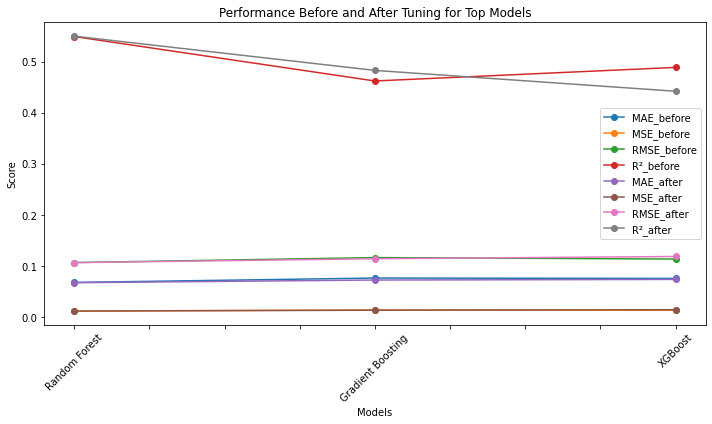

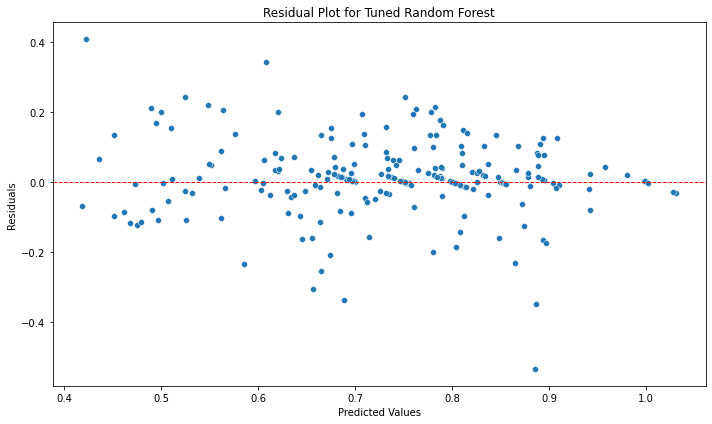

In [25]:
metrics_before = {
    'Random Forest': {'MAE': 0.0674, 'MSE': 0.0113, 'RMSE': 0.1063, 'R²': 0.5490},
    'Gradient Boosting': {'MAE': 0.0760, 'MSE': 0.0135, 'RMSE': 0.1161, 'R²': 0.4620},
    'XGBoost': {'MAE': 0.0752, 'MSE': 0.0128, 'RMSE': 0.1132, 'R²': 0.4886},
}

metrics_after = {
    'Random Forest': {'MAE': 0.0669, 'MSE': 0.0113, 'RMSE': 0.1062, 'R²': 0.5498},
    'Gradient Boosting': {'MAE': 0.0721, 'MSE': 0.0130, 'RMSE': 0.1138, 'R²': 0.4827},
    'XGBoost': {'MAE': 0.0733, 'MSE': 0.0140, 'RMSE': 0.1182, 'R²': 0.4419},
}

# Convert results to a DataFrame for easy plotting
import pandas as pd

df_before = pd.DataFrame(metrics_before).T
df_after = pd.DataFrame(metrics_after).T

# Combine the two DataFrames for easier comparison
df_comparison = pd.concat([df_before.add_suffix('_before'), df_after.add_suffix('_after')], axis=1)

# Plot the comparison
fig, ax = plt.subplots(figsize=(10, 6))
df_comparison.plot(kind='line', marker='o', ax=ax)
ax.set_title('Performance Before and After Tuning for Top Models')
ax.set_ylabel('Score')
ax.set_xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Create Residual Plot for Random Forest
best_model = RandomForestRegressor() 
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)
residuals_rf = y_test - y_pred_rf

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Plot for Tuned Random Forest')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [26]:
with open('productivity.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)